## Observations and Insights 

In [ ]:
%matplotlib inline

In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_set = pd.merge(mouse_metadata, study_results, on="Mouse ID", how='outer')

# Display the data table for preview
data_set

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [50]:
# Checking the number of mice.

len(data_set["Mouse ID"].unique())

249

In [51]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#duplicate_id = data_set[data_set.duplicated('Mouse ID')]
#timepoint_id = duplicate_id[['Mouse ID', 'Timepoint']]
#timepoint_id

timepoint_id = data_set.loc[data_set.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
timepoint_id


array(['g989'], dtype=object)

In [52]:
duplicate_mouse_data = data_set.loc[data_set["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [53]:
clean_data_complete = data_set[data_set["Mouse ID"].isin(timepoint_id)==False]
clean_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [54]:
timepoint_id = clean_data_complete[['Mouse ID', 'Timepoint']]
timepoint_id

,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [55]:
# Optional: Get all the data for the duplicate mouse ID. 

clean_data_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [56]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_data = clean_data_complete.drop_duplicates(subset=['Mouse ID'])

clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [57]:
# Checking the number of mice in the clean DataFrame.

len(clean_data_complete["Mouse ID"].unique())

248

## Summary Statistics

In [58]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_data = data_set[["Drug Regimen", "Tumor Volume (mm3)"]]
group_by_data = summary_data.groupby(["Drug Regimen"])

summary_df = pd.DataFrame({
    "Mean": group_by_data["Tumor Volume (mm3)"].mean(),
    "Median": group_by_data["Tumor Volume (mm3)"].median(),
    "Variance": group_by_data["Tumor Volume (mm3)"].var(),
    "Standard Deviation": group_by_data["Tumor Volume (mm3)"].std(),
    "SEM": group_by_data["Tumor Volume (mm3)"].sem()
})

summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [59]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

#clean_data_complete.agg('Capomulin', axis="columns")


## Bar and Pie Charts

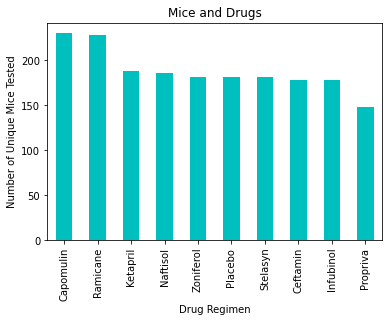

In [60]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

number_of_mice = clean_data_complete["Drug Regimen"].value_counts()

number_of_mice.plot(kind = "bar", color = "c")

plt.title("Mice and Drugs")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")

plt.show()

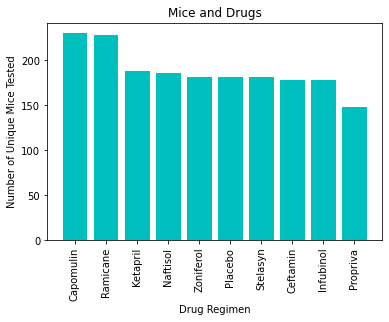

In [61]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

number_of_mice2 = clean_data_complete["Drug Regimen"].value_counts()

plt.bar(number_of_mice2.index.values, number_of_mice2.values, color="c")

plt.title("Mice and Drugs")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Unique Mice Tested")

plt.show()

In [90]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sex_data1 = clean_data_complete.Sex.value_counts()

colors = ["turquoise", "lightgreen"]

explode = (0.1, 0)

title = "Female vs Male"

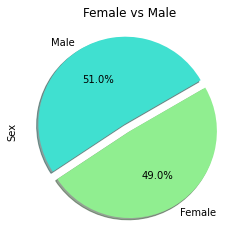

In [91]:
sex_data1.plot(kind="pie", autopct="%1.1f%%", explode=explode, colors=colors, shadow=True, title=title, startangle=30)
plt.show()

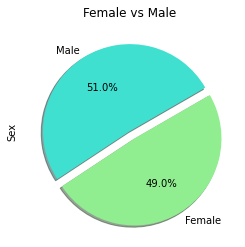

In [92]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_data2 = clean_data_complete.Sex.value_counts()
explode = [0, 0.1]
colors = ["turquoise", "lightgreen"]
plt.pie(sex_data2.values, labels=sex_data2.index.values, autopct="%1.1f%%", explode=explode, colors=colors, shadow=True, startangle=30)
plt.ylabel("Sex")
plt.title("Female vs Male")
plt.show()

## Quartiles, Outliers and Boxplots

In [65]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_tumor = clean_data_complete.groupby(["Mouse ID"])["Timepoint"].max()
max_tumor = max_tumor.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merge_data = max_tumor.merge(clean_data_complete, on=["Mouse ID", "Timepoint"], how='left')

merge_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [68]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes (use loc)
    final_tumor_vol = merge_data.loc[merge_data["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset (use append)
    tumor_vol_list.append(final_tumor_vol)    
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


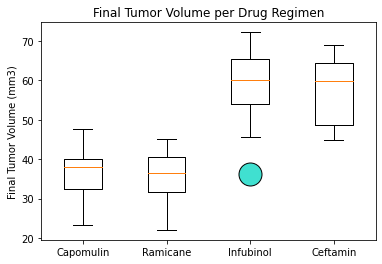

In [77]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

details = dict(markerfacecolor="turquoise", markersize=23)
plt.boxplot(tumor_vol_list, labels=treatments, flierprops=details)
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Final Tumor Volume per Drug Regimen")
plt.show()

## Line and Scatter Plots

In [85]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_data = clean_data_complete.loc[clean_data_complete["Drug Regimen"] == "Capomulin"]
capomulin_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


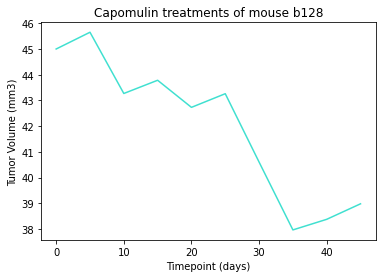

In [89]:
mouse_data = capomulin_data.loc[capomulin_data["Mouse ID"] == "b128"]
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], color="turquoise")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatments of mouse b128")
plt.show()

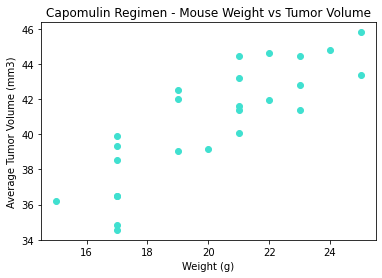

In [88]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_data = capomulin_data.loc[capomulin_data["Drug Regimen"] == "Capomulin"]
capomulin_avg = capomulin_data.groupby(["Mouse ID"]).mean()
plt.scatter(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"], color = "turquoise")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin Regimen - Mouse Weight vs Tumor Volume")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


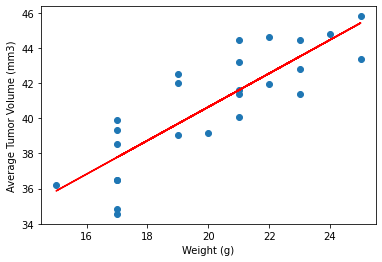

In [96]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = round(st.pearsonr(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])[0], 2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation}.")
model = st.linregress(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])

y_values = capomulin_avg['Weight (g)']*model[0]+model[1]
plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
plt.plot(capomulin_avg['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()